### Digit Recogntion MNIST Dataset using Logistic Regression Scikit Learn Library


In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn import datasets, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


## Digit Dataset

The digits dataset consists of 28x28 pixel images of digits. The images attribute of the dataset stores 28x28 arrays of grayscale values for each image. The target attribute of the dataset stores the digit each image represents.

#### Original MNSIT of 28 by 28 Images

We fetch the original mnist dataset from openml using the scikit fetch_openml module

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [4]:
#Train and Test Split splits :::We split our data using a ratio of 1/7
mnist_train,mnist_test,train_label,test_label = train_test_split(mnist.data,mnist.target,test_size=1/7.0,random_state=0)

In [5]:
print(mnist.data.shape)
print(mnist.target.shape)

(70000, 784)
(70000,)


In [6]:
print(mnist_train.shape)
print(mnist_test.shape)

(60000, 784)
(10000, 784)


In [7]:
##We plot a few examples of the trining and testing dataset

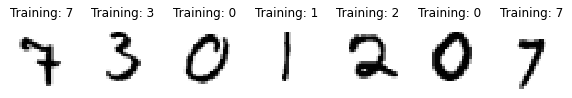

In [8]:
_, axes = plt.subplots(nrows=1, ncols=7, figsize=(10, 3))
for ax, image, label in zip(axes, mnist_train, train_label):
    ax.set_axis_off()
    ax.imshow(np.reshape(image,(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % int(label))

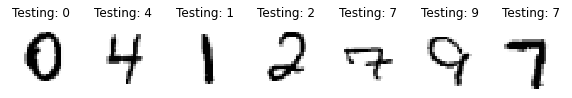

In [9]:
_, axes = plt.subplots(nrows=1, ncols=7, figsize=(10, 3))
for ax, image, label in zip(axes, mnist_test, test_label):
    ax.set_axis_off()
    ax.imshow(np.reshape(image,(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Testing: %i' % int(label))

## Classification

To apply our classifier, Logistic Regression on this data, we use flattened  digits images, turning each 2-D array of grayscale values from shape (28, 28) into shape (784,). Subsequently, the entire dataset will be of shape (n_samples, n_features), where n_samples is the number of images and n_features is the total number of pixels in each image.

#### Baseline Logistic Regression Modelling

In [ ]:
logisticRegr = LogisticRegression(max_iter = 5000)
logisticRegr.fit(mnist_train, train_label)

In [83]:
# Predict the value of the digit on the test subset
predicted =logisticRegr.predict(mnist_test)

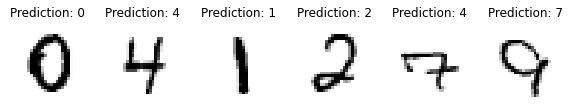

In [84]:
#Below we visualize the first 4 test samples and show their predicted digit value in the title.
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 3))
for ax, image, prediction in zip(axes, mnist_test, predicted):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

## Classification Report

In [88]:
print(f"Classification report for classifier {logisticRegr}:\n" f"{metrics.classification_report(test_label, predicted)}\n")

Classification report for classifier LogisticRegression(max_iter=5000):
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       996
           1       0.95      0.97      0.96      1141
           2       0.91      0.88      0.89      1040
           3       0.90      0.88      0.89      1013
           4       0.91      0.92      0.92       962
           5       0.89      0.86      0.87       863
           6       0.93      0.95      0.94       989
           7       0.93      0.91      0.92      1064
           8       0.86      0.88      0.87       963
           9       0.88      0.89      0.88       969

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000




##### Confusion Matrix

Confusion matrix:
[[ 962    0    2    1    3    7   10    3    7    1]
 [   0 1102    7    5    1    5    1    3   14    3]
 [   8   17  914   23   11    6   18    9   31    3]
 [   2    4   32  893    2   24    2   13   28   13]
 [   4    3    5    2  887    1    7   11    8   34]
 [  10    3    8   30   11  738   19    4   31    9]
 [   9    2    9    0   11   16  935    0    6    1]
 [   3    4   16    4   13    4    1  970    5   44]
 [   6   15   10   25    6   24   10    2  852   13]
 [   3    5    6   11   31    7    1   31    9  865]]


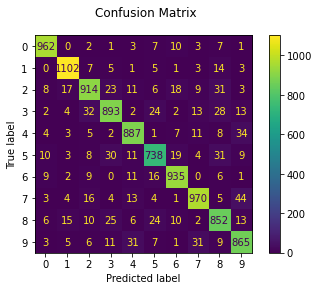

In [89]:
disp = metrics.plot_confusion_matrix(logisticRegr, mnist_test, test_label)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()


#### Optimizing Logistic Regression Modelling

##### Data Scaling

In [90]:
scaler = StandardScaler()
X_train = scaler.fit_transform(mnist_train)
X_test = scaler.transform(mnist_test)

In [91]:
# Turn up tolerance for faster convergence
logisticRegr = LogisticRegression(
    C=50. / 5000, penalty='l2', solver='saga', tol=0.1,max_iter =10000
)

In [93]:
logisticRegr.fit(X_train, train_label)
sparsity = np.mean(logisticRegr.coef_ == 0) * 100
score = logisticRegr.score(X_test, test_label)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

Sparsity with L1 penalty: 8.93%
Test score with L1 penalty: 0.8763


In [94]:
# Predict the value of the digit on the test subset
predicted =logisticRegr.predict(X_test)

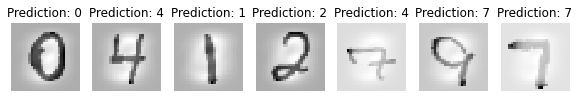

In [123]:
#Below we visualize the first 4 test samples and show their predicted digit value in the title.
_, axes = plt.subplots(nrows=1, ncols=7, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [98]:
print(f"Classification report for classifier {logisticRegr}:\n" f"{metrics.classification_report(test_label, predicted)}\n")

Classification report for classifier LogisticRegression(C=0.01, max_iter=10000, solver='saga', tol=0.1):
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       996
           1       0.84      0.98      0.90      1141
           2       0.89      0.82      0.86      1040
           3       0.86      0.84      0.85      1013
           4       0.86      0.92      0.89       962
           5       0.87      0.79      0.83       863
           6       0.91      0.93      0.92       989
           7       0.89      0.88      0.89      1064
           8       0.88      0.78      0.82       963
           9       0.83      0.84      0.84       969

    accuracy                           0.88     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.88      0.88     10000




Confusion matrix:
[[ 952    0    3    4    3   10   17    0    6    1]
 [   0 1114    6    3    1    5    1    1   10    0]
 [  16   26  857   27   25    2   26   19   38    4]
 [   7   27   36  847    2   30    5   24   19   16]
 [   0   11    4    0  881    3    6    3    4   50]
 [  14   27    6   41   22  685   25    9   16   18]
 [  13   10   14    0    7   12  923    2    8    0]
 [   6   40   12    4   24    1    0  938    3   36]
 [   8   55   15   44    9   31    6    7  749   39]
 [  14   19    5   14   46    6    0   46    2  817]]


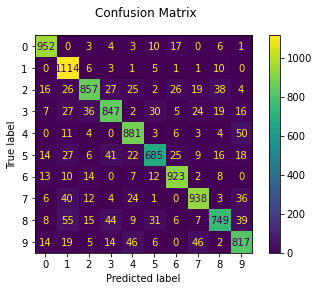

In [99]:
disp = metrics.plot_confusion_matrix(logisticRegr, X_test, test_label)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

#### SGD Model :::::::: Model trained using Stochastic Gradient Descent

Stochastic Gradient Descent is an optimization technique which minimizes a loss function in a stochastic fashion, performing a gradient descent step sample by sample. In particular, it is a very efficient method to fit linear models.

In [102]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline

Create a Pipeline for our model

In [103]:
clf = make_pipeline(StandardScaler(),SGDClassifier(loss='log',max_iter=1000, tol=1e-3))

In [104]:
clf.fit(X_train, train_label)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(loss='log'))])

In [105]:
# Predict the value of the digit on the test subset
predicted =clf.predict(X_test)

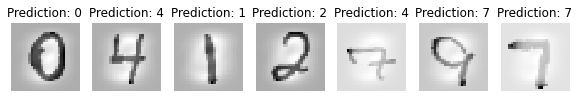

In [122]:
#Below we visualize the first 4 test samples and show their predicted digit value in the title.
_, axes = plt.subplots(nrows=1, ncols=7, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [107]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(test_label, predicted)}\n")

Classification report for classifier Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(loss='log'))]):
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       996
           1       0.97      0.95      0.96      1141
           2       0.92      0.87      0.89      1040
           3       0.92      0.83      0.87      1013
           4       0.94      0.89      0.91       962
           5       0.88      0.83      0.85       863
           6       0.95      0.93      0.94       989
           7       0.95      0.89      0.92      1064
           8       0.64      0.94      0.76       963
           9       0.90      0.84      0.87       969

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.90     10000
weighted avg       0.91      0.89      0.90     10000




Confusion matrix:
[[ 946    0    2    0    2    8    9    1   28    0]
 [   0 1087    6    1    0    8    1    0   38    0]
 [   3    6  906   16   13    3   13    7   71    2]
 [   3    5   25  836    0   33    2    7   87   15]
 [   0    1    5    1  859    0    4    6   60   26]
 [   5    2    8   25    8  718   14    4   72    7]
 [   5    2    8    0    8   16  923    1   26    0]
 [   5    2   12    1   10    4    0  947   45   38]
 [   1    7    6   13    1   18    4    0  906    7]
 [   4    5    7   12   16   10    0   21   78  816]]


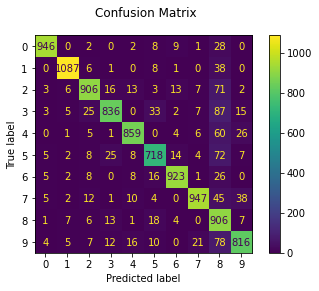

In [108]:
disp = metrics.plot_confusion_matrix(clf, X_test, test_label)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

### Early Stopping Of Stochastic Gradient Descent 
We try different stopping techniques using scikit learn
 

In [109]:
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
import time
import sys
import pandas as pd

In [110]:
@ignore_warnings(category=ConvergenceWarning)
def fit_and_score(estimator, max_iter, X_train, X_test, y_train, y_test):
    """Fit the estimator on the train set and score it on both sets"""
    estimator.set_params(max_iter=max_iter)
    estimator.set_params(random_state=0)

    start = time.time()
    estimator.fit(X_train, y_train)

    fit_time = time.time() - start
    n_iter = estimator.n_iter_
    train_score = estimator.score(X_train, y_train)
    test_score = estimator.score(X_test, y_test)

    return fit_time, n_iter, train_score, test_score

In [111]:
# Define the different logistics classifiers to compare
estimator_dict = {
    'No stopping criterion':
    SGDClassifier(loss='log',n_iter_no_change=3),
    'Training loss':
    SGDClassifier(loss='log',early_stopping=False, n_iter_no_change=3,
                               tol=0.1),
    'Validation score':
    SGDClassifier(loss='log',early_stopping=True, n_iter_no_change=3,
                               tol=0.0001, validation_fraction=0.2)
}

In [113]:
results = []
for estimator_name, estimator in estimator_dict.items():
    print(estimator_name + ': ', end='')
    for max_iter in range(1, 50):
        print('.', end='')
        sys.stdout.flush()

        fit_time, n_iter, train_score, test_score = fit_and_score(
            estimator, max_iter, X_train, X_test, train_label, test_label)

        results.append((estimator_name, max_iter, fit_time, n_iter,
                        train_score, test_score))
    print('')

No stopping criterion: .................................................
Training loss: .................................................
Validation score: .................................................


In [114]:
# Transform the results in a pandas dataframe for easy plotting
columns = [
    'Stopping criterion', 'max_iter', 'Fit time (sec)', 'n_iter_',
    'Train score', 'Test score'
]
results_df = pd.DataFrame(results, columns=columns)


In [115]:
# Define what to plot (x_axis, y_axis)
lines = 'Stopping criterion'
plot_list = [
    ('max_iter', 'Train score'),
    ('max_iter', 'Test score'),
    ('max_iter', 'n_iter_'),
    ('max_iter', 'Fit time (sec)'),
]

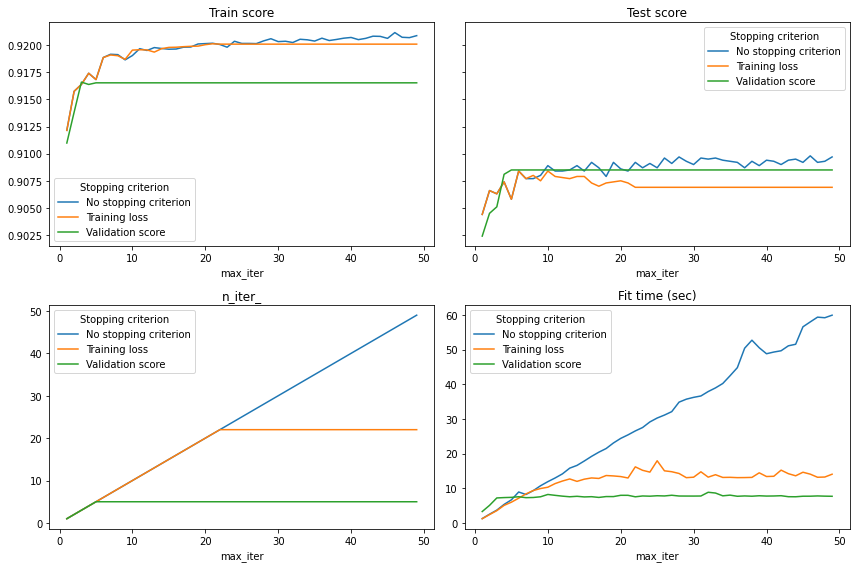

In [116]:
nrows = 2
ncols = int(np.ceil(len(plot_list) / 2.))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6 * ncols,
                                                            4 * nrows))
axes[0, 0].get_shared_y_axes().join(axes[0, 0], axes[0, 1])

for ax, (x_axis, y_axis) in zip(axes.ravel(), plot_list):
    for criterion, group_df in results_df.groupby(lines):
        group_df.plot(x=x_axis, y=y_axis, label=criterion, ax=ax)
    ax.set_title(y_axis)
    ax.legend(title=lines)
fig.tight_layout()
plt.show()
fig.savefig('early_Stopping'+'.png')

Confusion matrix:
[[ 961    0    2    2    1    8   10    1   11    0]
 [   0 1102    8    3    1    8    1    1   16    1]
 [   4    9  920   24   15    1   18    7   39    3]
 [   4    7   36  873    0   36    2    7   28   20]
 [   0    2    8    1  885    0    8    6   15   37]
 [   9    2    9   29   12  741   13    4   32   12]
 [   5    2    9    0    6   18  933    1   15    0]
 [   5    3   18    3   11    3    1  964   10   46]
 [   2   13    9   22    3   19    7    2  862   24]
 [   4    5    7   17   23    9    1   23   24  856]]


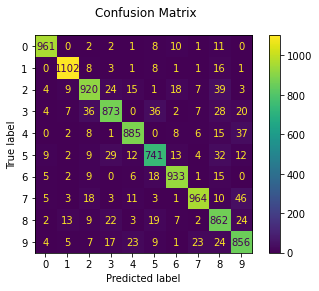

In [128]:
#Confusion matrix for no stopping criterion
disp = metrics.plot_confusion_matrix(estimator_dict['No stopping criterion'], X_test, test_label)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

Confusion matrix:
[[ 963    0    2    2    1    8   10    1    9    0]
 [   0 1095   10    5    1    7    1    1   21    0]
 [   4    9  916   24   17    1   19    8   39    3]
 [   4    7   35  870    0   35    3    7   30   22]
 [   0    2    5    1  880    0   10    8   16   40]
 [   9    2    8   34   13  734   16    5   30   12]
 [   5    2   10    0    6   15  935    1   15    0]
 [   8    3   20    3   11    4    1  961    8   45]
 [   3   17    9   21    3   19    8    2  857   24]
 [   5    5    6   17   21    9    1   25   22  858]]


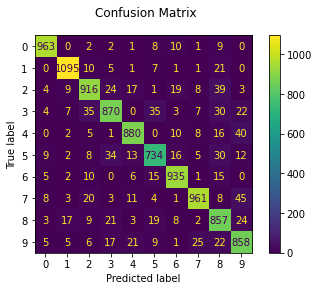

In [119]:
#Confusion matrix for training loss stopping criterion
disp = metrics.plot_confusion_matrix(estimator_dict['Training loss'], X_test, test_label)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

Confusion matrix:
[[ 969    0    3    1    2    6    8    2    5    0]
 [   0 1101    9    3    1    6    1    1   18    1]
 [  11    5  935   18   16    3   15    6   28    3]
 [   6    9   36  869    0   36    2    8   25   22]
 [   0    3    6    0  889    0    9    8   13   34]
 [  12    3    9   29   14  738   16    5   24   13]
 [   7    1   13    0    7   17  933    1   10    0]
 [  10    3   21    4   11    2    1  969    5   38]
 [   4   20   13   21    4   28    8    2  836   27]
 [   5    5    7   18   30    8    1   34   15  846]]


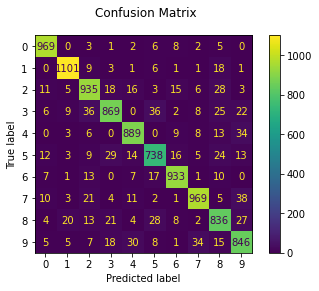

In [121]:
#Confusion matrix for validation score stopping criterion
disp = metrics.plot_confusion_matrix(estimator_dict['Validation score'], X_test, test_label)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()